## 머신러닝 실습

### 와인품질 등급 회귀분석

#### 데이터 수집

##### UC 어바인 머신러닝 연구소 모듈 사용

In [1]:
# 필수 라이브러리 사용등록
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

In [2]:
## 와인 데이터 가져오기 , 와인품질  id = 136
wineQuality = fetch_ucirepo(id =186)

In [3]:
dfWineQuality = wineQuality.data.original

In [4]:
dfWineQuality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
dfWineQuality.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


#### 머신러닝 준비
- X, y 값 생성

In [9]:
X = dfWineQuality.drop(['quality', 'color'], axis=1)

In [10]:
y = dfWineQuality['quality']

#### 분석모델 구축, 결과 분석

In [14]:
## 회귀분석용 모델, 분석 사용등록
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn

In [15]:
# 훈련용 데이터와 검증(평가)용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=124)

In [16]:
X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
3829,7.1,0.200,0.36,11.60,0.042,45.0,124.0,0.99700,2.92,0.59,9.5
861,5.8,1.010,0.66,2.00,0.039,15.0,88.0,0.99357,3.66,0.60,11.5
6296,6.7,0.350,0.32,9.00,0.032,29.0,113.0,0.99188,3.13,0.65,12.9
6250,5.7,0.390,0.25,4.90,0.033,49.0,113.0,0.98966,3.26,0.58,13.1
5436,8.0,0.270,0.33,1.20,0.050,41.0,103.0,0.99002,3.00,0.45,12.4
...,...,...,...,...,...,...,...,...,...,...,...
962,6.6,0.570,0.02,2.10,0.115,6.0,16.0,0.99654,3.38,0.69,9.5
135,8.4,0.745,0.11,1.90,0.090,16.0,63.0,0.99650,3.19,0.82,9.6
6161,5.6,0.180,0.30,10.20,0.028,28.0,131.0,0.99540,3.49,0.42,10.8
4764,6.1,0.680,0.52,1.40,0.037,32.0,123.0,0.99022,3.24,0.45,12.0


In [19]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
6065,6.2,0.32,0.24,4.1,0.051,34.0,149.0,0.99306,3.36,0.52,11.000000
6417,6.0,0.27,0.40,1.7,0.021,18.0,82.0,0.98910,3.24,0.95,13.133333
281,7.7,0.27,0.68,3.5,0.358,5.0,10.0,0.99720,3.25,1.08,9.900000
2400,6.0,0.28,0.49,6.8,0.048,61.0,222.0,0.99530,3.19,0.47,9.300000
256,9.4,0.34,0.37,2.2,0.075,5.0,13.0,0.99800,3.22,0.62,9.200000
...,...,...,...,...,...,...,...,...,...,...,...
6443,4.8,0.29,0.23,1.1,0.044,38.0,180.0,0.98924,3.28,0.34,11.900000
382,8.3,0.26,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.400000
4185,6.8,0.18,0.30,12.8,0.062,19.0,171.0,0.99808,3.00,0.52,9.000000
4944,6.8,0.18,0.24,9.8,0.058,64.0,188.0,0.99520,3.13,0.51,10.600000


In [20]:
y_train

3829    7
861     6
6296    7
6250    7
5436    6
       ..
962     5
135     5
6161    7
4764    6
4558    7
Name: quality, Length: 4547, dtype: int64

In [21]:
y_test

6065    5
6417    6
281     7
2400    5
256     5
       ..
6443    6
382     6
4185    7
4944    6
1144    5
Name: quality, Length: 1950, dtype: int64

In [22]:
# 선형회귀 모델 생성
model = LinearRegression()

In [23]:
# 선형회귀 모델 훈련
model.fit(X_train, y_train) # X는 독립변수 11, y는 종속변수(품질)

LinearRegression()

In [27]:
# 선형회귀 분석, 예측
# X_test를 매개변수로 실행했을 때 문제가 생기면 np.array(X_test)를 사용
y_predict = model.predict(X_test)

In [28]:
y_test

6065    5
6417    6
281     7
2400    5
256     5
       ..
6443    6
382     6
4185    7
4944    6
1144    5
Name: quality, Length: 1950, dtype: int64

In [29]:
y_predict

array([5.94751835, 7.00710726, 5.82828291, ..., 5.39394524, 6.22637817,
       5.85967006])

In [34]:
## 분석평가지표별  수치 
## MSE, RMSE가 0에 가까우면 예측값과 실제값간의 차이가 거의 없음
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f'MSE = {mse:.4f}')
print(f'RMSE = {rmse:.4f}')
print(f'R^2(VS) = {r2:.4f}')

MSE = 0.5581
RMSE = 0.7471
R^2(VS) = 0.2736


In [38]:
# Y 절편값, 회귀계수 값
print(f'Y절편값 = {model.intercept_:.4f}')
print(f'독립변수별 회귀계수값 = {np.round(model.coef_, 1)}')

Y절편값 = 48.1954
독립변수별 회귀계수값 = [  0.1  -1.3  -0.1   0.   -0.6   0.   -0.  -47.5   0.4   0.8   0.3]


In [39]:
pd.Series(data=np.round(model.coef_, 2), index=X.columns)

fixed_acidity            0.07
volatile_acidity        -1.29
citric_acid             -0.14
residual_sugar           0.04
chlorides               -0.63
free_sulfur_dioxide      0.01
total_sulfur_dioxide    -0.00
density                -47.54
pH                       0.41
sulphates                0.77
alcohol                  0.28
dtype: float64

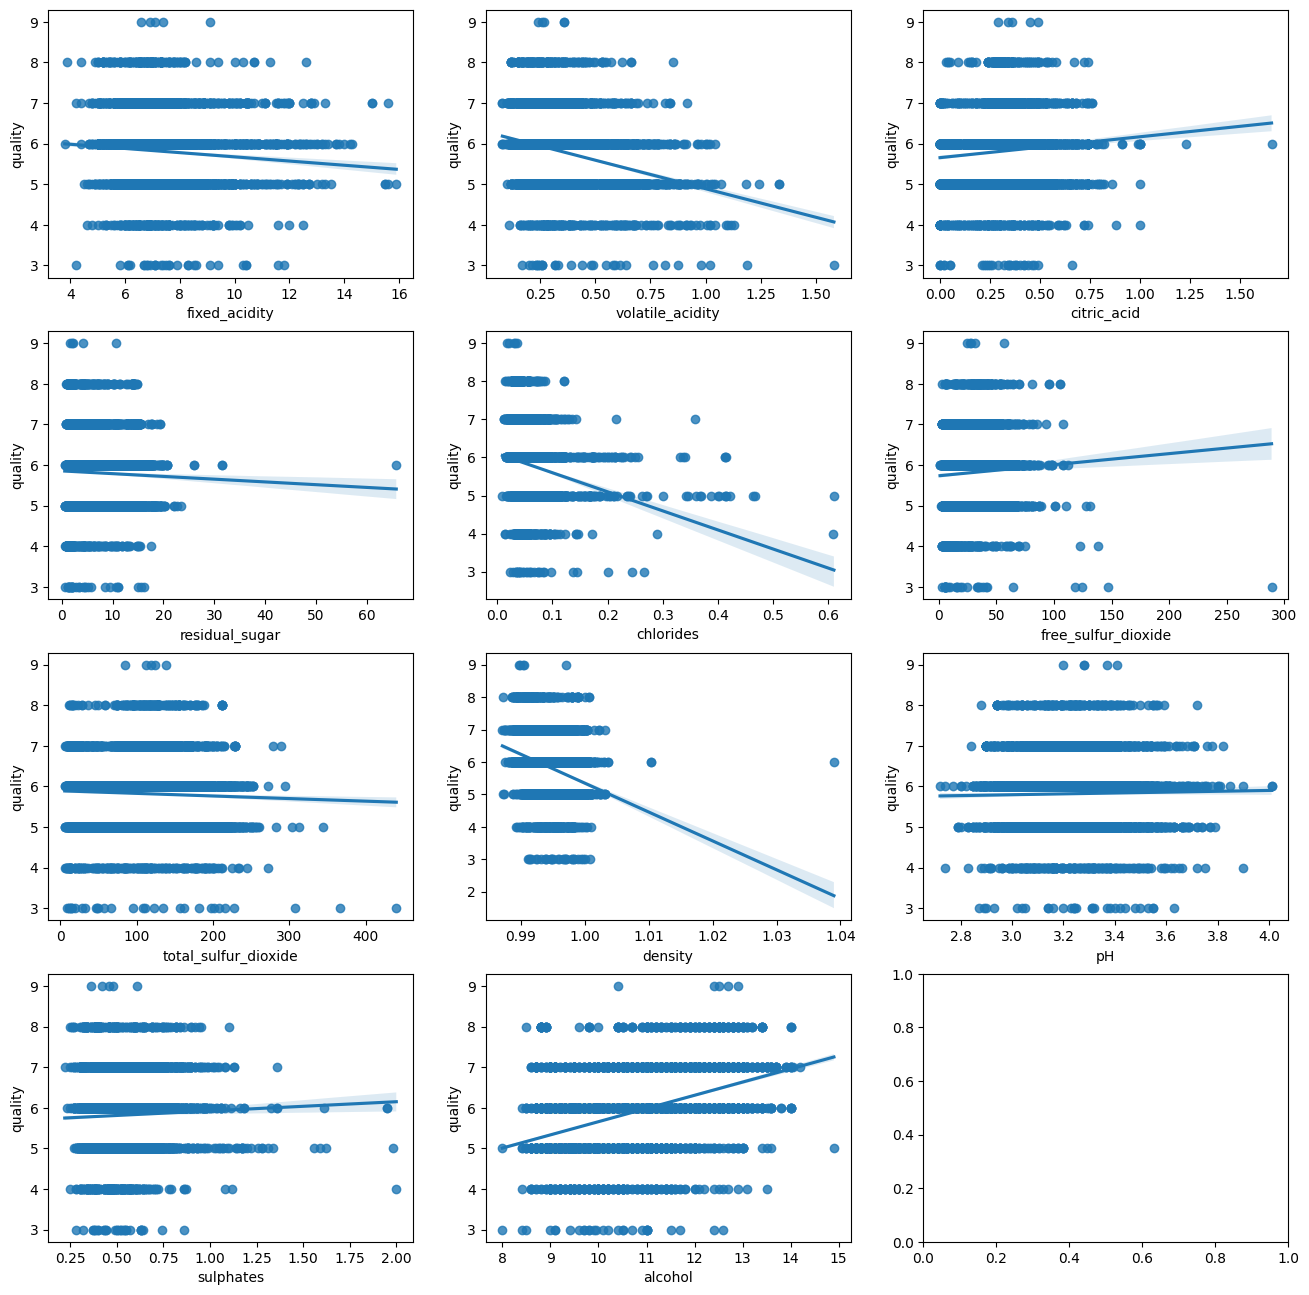

In [41]:
## 산점도
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=4)

x_features = list(X.columns)

for i, feat in enumerate(x_features):
    row = i // 3
    col = i % 3
    sns.regplot(data=dfWineQuality, x=feat, y='quality',ax=axs[row][col])

plt.show()

In [42]:
## 9등급 와인추출
dfWineQuality[dfWineQuality['quality'] == 9]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,white
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,white
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,white
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,white
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,white


In [45]:
## 9등급 와인 추출
dfTemp = dfWineQuality[dfWineQuality['quality'] == 9]

In [46]:
## 9등급 와인 최종 테스트 값
dfWineTop = dfTemp.drop(['quality','color'], axis = 1)

In [47]:
predicts = model.predict(dfWineTop)

In [48]:
predicts

array([6.01846969, 6.55978578, 6.49665658, 6.69183305, 6.64952633])

## 결론
- 머신러닝으로 학습을 해도 9등급 와인에 대해서 예측을 못함